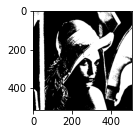

In [4]:
# 1、灰度化 & 二值化
# 引入cv
import cv2
# 引入numpy 创建图片
import numpy as np
# 引入写好的方法
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

img = cv2.imread("lenna.png")

# print(img)
# 显示原图
# cv2.imshow("111",img)
# cv2.waitKey(0)
# 获取图片的高（high）和宽(wide)
# h,w = img.shape[:2]
# 创建一张单通道图片 （灰度化 单通道）传入高宽和类型
# img_gray = np.zeros([h,w],img.dtype)
# 手写算法
# for i in range(h):
#     for j in range(w):
#         #取出当前high和wide中的BGR坐标
#         m = img[i,j]            
#         #将BGR坐标转化为gray坐标并赋值给新图像
#         img_gray[i,j] = int(m[0]*0.11 + m[1]*0.59 + m[2]*0.3) 
# 显示灰度化        
# cv2.imshow("222",img_gray)     
# cv2.waitKey(0)
# 灰度化
img_gray = rgb2gray(img)
# cv2.imshow("333",img_gray) 
# cv2.waitKey(0)

# 二值化
img_binary = np.where(img_gray >= 0.5,1,0)

# cv2.imshow("444",img_binary)    显示报错
# cv2.waitKey(0)
plt.subplot(221) 
plt.imshow(img_binary, cmap='gray')
plt.show()

In [3]:
# 2.最邻近插值

import cv2
import numpy as np

# 定义一个方法
def function(img):
    height,width,channels =img.shape
    emptyImage=np.zeros((1000,1000,channels),np.uint8)
    sh=1000/height
    sw=1000/width
    for i in range(1000):
        for j in range(1000):
            x=int(i/sh + 0.5)  #int(),转为整型，使用向下取整。
            y=int(j/sw + 0.5)
            emptyImage[i,j]=img[x,y]
    return emptyImage
    

img=cv2.imread("lenna.png")
zoom=function(img)
# print(zoom)
# print(zoom.shape)
cv2.imshow("nearest interp",zoom)
cv2.imshow("image",img)
cv2.waitKey(0)


-1

In [5]:
# 双线性插值

import numpy as np
import cv2
 
def f(img,out_dim):
    src_h, src_w, channel = img.shape
    dst_h, dst_w = out_dim[1], out_dim[0]
#     print ("src_h, src_w = ", src_h, src_w)
#     print ("dst_h, dst_w = ", dst_h, dst_w)
    
    # 如果高宽和原图相等则返回原图
    if src_h == dst_h and src_w == dst_w:
        return img.copy()
    dst_img = np.zeros((dst_h,dst_w,3),dtype=np.uint8)
    scale_x, scale_y = float(src_w) / dst_w, float(src_h) / dst_h
    for i in range(3):
        for dst_y in range(dst_h):
            for dst_x in range(dst_w):
 
                # find the origin x and y coordinates of dst image x and y
                # use geometric center symmetry
                # if use direct way, src_x = dst_x * scale_x
                src_x = (dst_x + 0.5) * scale_x-0.5
                src_y = (dst_y + 0.5) * scale_y-0.5
 
                # find the coordinates of the points which will be used to compute the interpolation
                src_x0 = int(np.floor(src_x))
                src_x1 = min(src_x0 + 1 ,src_w - 1)
                src_y0 = int(np.floor(src_y))
                src_y1 = min(src_y0 + 1, src_h - 1)
 
                # calculate the interpolation
                temp0 = (src_x1 - src_x) * img[src_y0,src_x0,i] + (src_x - src_x0) * img[src_y0,src_x1,i]
                temp1 = (src_x1 - src_x) * img[src_y1,src_x0,i] + (src_x - src_x0) * img[src_y1,src_x1,i]
                dst_img[dst_y,dst_x,i] = int((src_y1 - src_y) * temp0 + (src_y - src_y0) * temp1)
 
    return dst_img
 
i = cv2.imread('lenna.png')
dst = f(i,(1000,1000))
cv2.imshow('bilinear interp',dst)
cv2.imshow("image",i)
cv2.waitKey()


-1